# Problema

Predecir el coste del seguro

## Instrucciones

 Utilizar el dataset (insurance.csv) para entrenar un modelo de regresión capaz de predecir el valor del seguro en función de las características del cliente. Realizar limpieza, preprocesado modelado y testeo del modelo aportando conclusiones de todos estos pasos.

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error, mean_squared_log_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# imports

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [6]:
ruta = "/gdrive/MyDrive/EDEM/ML/Regresion_Contenido/EJERCICIOS/insurance.csv"
data = pd.read_csv(ruta)

In [8]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de regresión

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

## Implementación

### Aplicar las técnicas oportunas de procesamiento de datos

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Todo bien, no hay nulls

In [10]:
data.duplicated().agg(['sum','mean'])

sum     1.000000
mean    0.000747
dtype: float64

In [11]:
data = data.drop_duplicates()

In [12]:
# Estadísticas descriptivas
descriptive_stats = data.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


Ojo! the ratio of height to weight, ideally 18.5 to 24.9

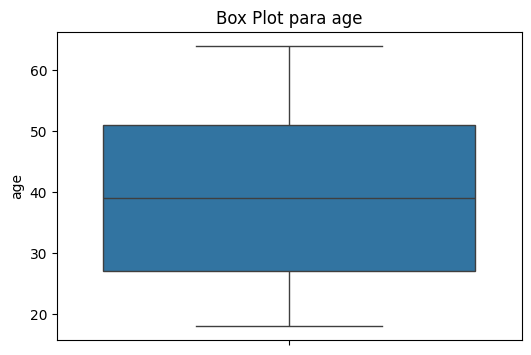

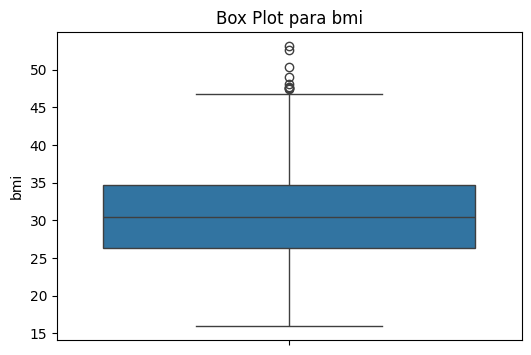

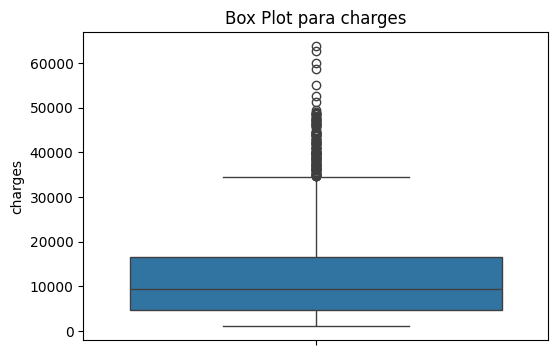

In [13]:

columns = ['age', 'bmi', 'charges']


for column in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data[column])
    plt.title(f'Box Plot para {column}')
    plt.show()

Outliers charges

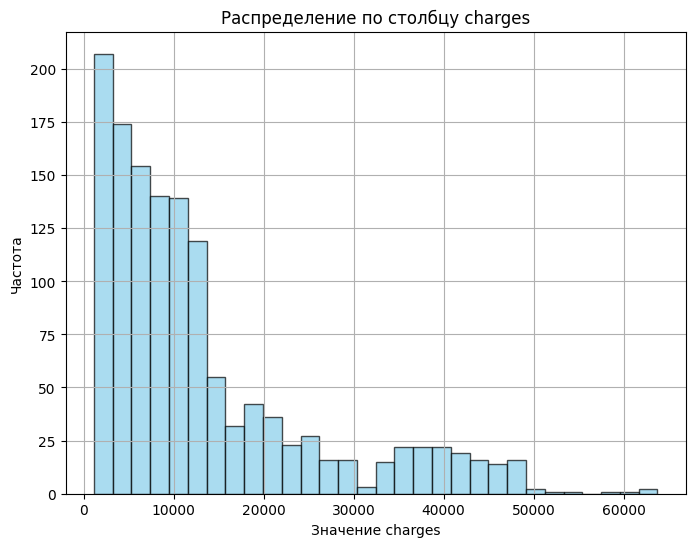

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(data['charges'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение по столбцу charges')
plt.xlabel('Значение charges')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [15]:

q99 = data['charges'].quantile(0.99)



print("Q (99%):", q99)

Q (99%): 48537.79687800001


In [16]:
count_over = len(data[data['charges'] >48537.79687800001])


total_rows = len(data)


fraction_over = count_over / total_rows


print(" с charges > 48537:", fraction_over)

 с charges > 48537: 0.010471204188481676


1% de datos, podemos quitar

In [17]:
data = (data[data['charges'] < 48538])

Outliers bmi

In [18]:
q95 = data['bmi'].quantile(0.99)



print("Q (95%):", q95)

Q (95%): 46.1758


Segun internet bmi = 50 - es como maximum y 99% esta menos que 50 por eso quitamos todo que mas que 50

In [19]:
count_over_50 = len(data[data['bmi'] > 50])


total_rows = len(data)


fraction_over_50 = count_over_50 / total_rows


print(" с charges > 50:", fraction_over_50)

 с charges > 50: 0.0022675736961451248


0,22 % de datos quitamo

In [20]:
data = data[data['bmi'] < 50]



In [21]:
data.describe()

,age,bmi,children,charges
count,1320.000000,1320.000000,1320.000000,1320.000000
mean,39.146212,30.536659,1.099242,12848.522876
std,14.009116,5.989964,1.207758,11407.080560
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.215000,0.000000,4719.683425
50%,39.000000,30.230000,1.000000,9285.794350
75%,51.000000,34.430000,2.000000,16073.095438
max,64.000000,49.060000,5.000000,48517.563150


Bien estado de datos

Label encoding



male -0

female - 1

smoker no - 0

smoker yes -1


In [22]:
# Заменяем значения в столбце 'sex'
data['sex'] = data['sex'].replace({'female': 1, 'male': 0})

# Заменяем значения в столбце 'smoker'
data['smoker'] = data['smoker'].replace({'yes': 1, 'no': 0})

data['region'] = data['region'].replace({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})


data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


Ahora quiero entender que features influen más a target

In [23]:



# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('charges', axis=1)
y = data['charges']  # Целевая переменная
# Создание модели линейной регрессии
model = LinearRegression()

# Обучение модели
model.fit(X, y)

# Получение коэффициентов регрессии (весов)
coefficients = model.coef_

# Создание DataFrame для анализа

coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
# Вывод результатов
print(coefficients_df)


    Feature   Coefficient
4    smoker  22876.521717
3  children    522.914230
5    region    357.679124
2       bmi    303.714814
0       age    250.369046
1       sex    110.351561


In [24]:


# Создание модели случайного леса
model = RandomForestRegressor()

# Обучение модели
model.fit(X, y)

# Получение важности признаков
feature_importance = model.feature_importances_

# Создание DataFrame для анализа

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Вывод результатов
print(feature_importance_df)


    Feature  Importance
4    smoker    0.607893
2       bmi    0.207783
0       age    0.140992
3  children    0.021701
5    region    0.015079
1       sex    0.006552


In [27]:


# Создание модели Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Создание модели Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Создание модели ElasticNet
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)

# Создание DataFrame для анализа
lasso_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})
ridge_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_model.coef_})
elasticnet_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': elasticnet_model.coef_})

# Вывод результатов
print("Lasso:")
print(lasso_coef)
print("\nRidge:")
print(ridge_coef)
print("\nElasticNet:")
print(elasticnet_coef)


Lasso:
    Feature   Coefficient
0       age    257.323824
1       sex    216.705002
2       bmi    282.480940
3  children    525.699822
4    smoker  22796.788329
5    region    408.413280

Ridge:
    Feature   Coefficient
0       age    257.318866
1       sex    216.177073
2       bmi    282.454269
3  children    525.789083
4    smoker  22783.836876
5    region    408.541909

ElasticNet:
    Feature   Coefficient
0       age    255.368962
1       sex   -117.124954
2       bmi    268.880860
3  children    529.287707
4    smoker  17332.794197
5    region    421.218361


A target más influen: smoker, children, region

## Valorar diferentes modelos de regresión

In [26]:

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение моделей
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    results[name] = {
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R-squared": r2,
        "Explained Variance Score": explained_variance,
        "Median Absolute Error": median_ae
    }

# Вывод результатов
for name, metrics in results.items():
    print(name)
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


Linear Regression
Mean Squared Error: 36481211.32966568
Mean Absolute Error: 4046.242570772847
R-squared: 0.7065663081150746
Explained Variance Score: 0.7122029315584375
Median Absolute Error: 1937.4364784720044


Lasso
Mean Squared Error: 36480580.6523665
Mean Absolute Error: 4046.6837665632547
R-squared: 0.7065713809172525
Explained Variance Score: 0.7122082527679103
Median Absolute Error: 1936.4239059557765


Ridge
Mean Squared Error: 36501529.47990428
Mean Absolute Error: 4055.91930965077
R-squared: 0.706402880706294
Explained Variance Score: 0.7120035144401057
Median Absolute Error: 1930.110365415624


ElasticNet
Mean Squared Error: 83419700.20633903
Mean Absolute Error: 6950.265921217347
R-squared: 0.3290203445746148
Explained Variance Score: 0.33126088885174143
Median Absolute Error: 4858.083912618406


Decision Tree
Mean Squared Error: 45628975.983478956
Mean Absolute Error: 3197.3709449242424
R-squared: 0.6329869981901304
Explained Variance Score: 0.6331392516797394
Median Abs

Basado en los resultados proporcionados:

Random Forest y Gradient Boosting muestran los mejores resultados entre los modelos considerados. Tienen los valores más bajos de error cuadrático medio (MSE), error absoluto medio (MAE) y error absoluto mediano (Median AE), así como los valores más altos de coeficiente de determinación (R-squared) y puntuación de varianza explicada (Explained Variance Score).